IMPORTS

In [113]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from selenium import webdriver 

In [114]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from bs4 import BeautifulSoup
import re
import json
from urllib.request import Request, urlopen
from lxml import html
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

CRAWLER

In [115]:
#CONFIGURANDO SERVIÇO PARA WEBCRAWLER, USANDO O XPATH PARA COLETAR UM ELEMENTO, ASSIM FORÇANDO O SCRAPPING APÓS O CARREGAMENTO COMPLETO DA PÁGINA
service = Service(executable_path='C:/Users/Gustavo/Documents/FIAP/2TIAR/FRONT_END/CKP1/chromedriver.exe')

try:
    browser = webdriver.Chrome(service=service)
    browser.get("https://www.imdb.com/chart/top/?ref_=nv_mv_250")
    timeout_in_seconds = 10
    WebDriverWait(browser, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/main/div/div[3]/section/div/div[2]/div/ul')))
    html = browser.page_source
    soup = BeautifulSoup(html, features="html.parser")
    print(soup)

except TimeoutException:
    print("deu ruim")
finally:
    browser.quit()

<html class="scriptsOn" lang="pt-BR" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js"></script><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><title>Os 250 melhores filmes do IMDb</title><meta content="Conforme avaliado pelos eleitores regulares do IMDb." data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="Os 250 melhores filmes do IMDb" property="og:title"/><meta content="Conforme avaliado pelos eleitores regulares do IMDb." property="og:description"/><meta content="website" property="og:type"/><meta content="https://m.media-amazon.com/images/G/01/imdb/images/social/imdb_logo.png" property="og:image"/><meta content="1000" property="og:image:height"/><meta content="1000" prope

In [116]:
#VERIFICANDO TODOS OS TITULOS (COMO MOSTRA APENAS ATÉ O 24, UTILIZO UM CONTADOR PARA SABER ATÉ QUE LINHA CHEGAMOS)
titles = soup.find_all('h3', attrs={'class':'ipc-title__text'})
i = 0
for t in titles:
    i = i + 1
    print(f'{t}+{i}')

<h3 class="ipc-title__text">Tabelas do IMDb</h3>+1
<h3 class="ipc-title__text">1. Um Sonho de Liberdade</h3>+2
<h3 class="ipc-title__text">2. O Poderoso Chefão</h3>+3
<h3 class="ipc-title__text">3. Batman: O Cavaleiro das Trevas</h3>+4
<h3 class="ipc-title__text">4. O Poderoso Chefão II</h3>+5
<h3 class="ipc-title__text">5. 12 Homens e uma Sentença</h3>+6
<h3 class="ipc-title__text">6. A Lista de Schindler</h3>+7
<h3 class="ipc-title__text">7. O Senhor dos Anéis: O Retorno do Rei</h3>+8
<h3 class="ipc-title__text">8. Pulp Fiction: Tempo de Violência</h3>+9
<h3 class="ipc-title__text">9. O Senhor dos Anéis: A Sociedade do Anel</h3>+10
<h3 class="ipc-title__text">10. Três Homens em Conflito</h3>+11
<h3 class="ipc-title__text">11. Forrest Gump: O Contador de Histórias</h3>+12
<h3 class="ipc-title__text">12. O Senhor dos Anéis: As Duas Torres</h3>+13
<h3 class="ipc-title__text">13. Clube da Luta</h3>+14
<h3 class="ipc-title__text">14. A Origem</h3>+15
<h3 class="ipc-title__text">15. Star W

In [117]:
#CRIANDO UMA LISTA COM OS TITULOS DE TODOS OS FILMES
list_title_en = []
for x in titles:
  if x.text != 'IMDb Charts' and x.text != 'Recently viewed':
    tit = (x.text).split('.')[-1].strip()
    list_title_en.append(tit)
print(len(list_title_en))
list_title_en

264


['Tabelas do IMDb',
 'Um Sonho de Liberdade',
 'O Poderoso Chefão',
 'Batman: O Cavaleiro das Trevas',
 'O Poderoso Chefão II',
 '12 Homens e uma Sentença',
 'A Lista de Schindler',
 'O Senhor dos Anéis: O Retorno do Rei',
 'Pulp Fiction: Tempo de Violência',
 'O Senhor dos Anéis: A Sociedade do Anel',
 'Três Homens em Conflito',
 'Forrest Gump: O Contador de Histórias',
 'O Senhor dos Anéis: As Duas Torres',
 'Clube da Luta',
 'A Origem',
 'Star Wars: Episódio V - O Império Contra-Ataca',
 'Matrix',
 'Os Bons Companheiros',
 'Um Estranho no Ninho',
 'Interestelar',
 'Seven: Os Sete Crimes Capitais',
 'A Felicidade Não se Compra',
 'Os Sete Samurais',
 'O Silêncio dos Inocentes',
 'O Resgate do Soldado Ryan',
 'Cidade de Deus',
 'A Vida é Bela',
 'À Espera de um Milagre',
 'O Exterminador do Futuro 2: O Julgamento Final',
 'Star Wars: Episódio IV - Uma Nova Esperança',
 'De Volta para o Futuro',
 'A Viagem de Chihiro',
 'O Pianista',
 'Parasita',
 'Psicose',
 'Gladiador',
 'O Rei Leão'

In [118]:
#CRIANDO UMA LISTA COM O ANO DE LANÇAMENTO DE TODOS OS FILMES
list_years = []
years = soup.find_all('div', attrs={'class':'sc-b189961a-7 btCcOY cli-title-metadata'})

for y in years:
  year = y.find('div', attrs={'class':'sc-b189961a-7 btCcOY cli-title-metadata'})
for year in years:
    # print(year.text)
  list_years.append(year.text[:4])
display(len(list_years))
list_years

250

['1994',
 '1972',
 '2008',
 '1974',
 '1957',
 '1993',
 '2003',
 '1994',
 '2001',
 '1966',
 '1994',
 '2002',
 '1999',
 '2010',
 '1980',
 '1999',
 '1990',
 '1975',
 '2014',
 '1995',
 '1946',
 '1954',
 '1991',
 '1998',
 '2002',
 '1997',
 '1999',
 '1991',
 '1977',
 '1985',
 '2001',
 '2002',
 '2019',
 '1960',
 '2000',
 '1994',
 '2023',
 '2006',
 '2014',
 '1998',
 '1994',
 '1988',
 '2006',
 '1962',
 '2024',
 '1995',
 '1942',
 '2011',
 '1988',
 '1936',
 '1979',
 '1954',
 '1968',
 '1931',
 '2012',
 '1979',
 '2000',
 '2008',
 '1981',
 '2023',
 '2006',
 '1950',
 '2018',
 '1957',
 '2018',
 '1957',
 '1980',
 '1940',
 '1986',
 '2009',
 '2012',
 '2017',
 '1984',
 '1964',
 '1995',
 '2003',
 '1999',
 '2019',
 '1995',
 '1981',
 '1997',
 '1997',
 '2019',
 '2016',
 '1963',
 '2009',
 '1984',
 '1952',
 '2018',
 '1985',
 '2000',
 '2010',
 '1983',
 '2004',
 '2012',
 '1968',
 '1952',
 '1992',
 '1962',
 '1960',
 '2010',
 '2023',
 '1959',
 '1983',
 '1941',
 '1944',
 '1931',
 '1958',
 '1987',
 '1995',
 '2001',
 

In [119]:
#CRIANDO UMA LISTA COM A CLASSIFICAÇÃO DE TODOS OS FILMES
list_rating = []

rating_span = soup.find_all('span', class_='ipc-rating-star--rating')
for x in rating_span:
  list_rating.append(x.text)
display(len(list_rating))
list_rating

250

['9,3',
 '9,2',
 '9,0',
 '9,0',
 '9,0',
 '9,0',
 '9,0',
 '8,9',
 '8,9',
 '8,8',
 '8,8',
 '8,8',
 '8,8',
 '8,8',
 '8,7',
 '8,7',
 '8,7',
 '8,7',
 '8,7',
 '8,6',
 '8,6',
 '8,6',
 '8,6',
 '8,6',
 '8,6',
 '8,6',
 '8,6',
 '8,6',
 '8,6',
 '8,5',
 '8,6',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,6',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,6',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,5',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,9',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,4',
 '8,3',
 '8,4',
 '8,3',
 '8,3',
 '8,4',
 '8,4',
 '8,4',
 '8,4',
 '8,3',
 '8,3',
 '8,4',
 '8,4',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,3',
 '8,2',
 '8,3',
 '8,3',
 '8,3',
 '8,2',
 '8,3',
 '8,3',
 '8,3',
 '8,2',
 '8,2',
 '8,3',
 '8,3',
 '8,2',
 '8,2',
 '8,2',
 '8,3',
 '8,3',


In [120]:
#CRIANDO UMA LISTA COM OS LINKS PARA COLETAR O GÊNERO POSTERIORMENTE

list_links = []
for a in soup.find_all('a', href=True):
  if '/title/' in a['href'] and 'https://www.imdb.com/'+a['href'] not in list_links:
    list_links.append(('https://www.imdb.com/'+a['href'])[:-15])

#JOGA FORA OS DUPLICADOS
list_links = list(dict.fromkeys(list_links))
list_links = list_links[1:]
display(len(list_links))
list_links[:5]

273

['https://www.imdb.com//title/tt0111161/',
 'https://www.imdb.com//title/tt0068646/',
 'https://www.imdb.com//title/tt0468569/',
 'https://www.imdb.com//title/tt0071562/',
 'https://www.imdb.com//title/tt0050083/']

In [121]:
headers = {
          'authority': 'www.amazon.com.br',
          'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
          'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
          'cache-control': 'max-age=0',
          'device-memory': '8',
          'downlink': '10',
          'dpr': '1.875',
          'ect': '4g',
          'rtt': '50',
          'sec-ch-device-memory': '8',
          'sec-ch-dpr': '1.875',
          'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
          'sec-ch-ua-mobile': '?0',
          'sec-ch-ua-platform': '"Windows"',
          'sec-ch-ua-platform-version': '"10.0.0"',
          'sec-ch-viewport-width': '455',
          'sec-fetch-dest': 'document',
          'sec-fetch-mode': 'navigate',
          'sec-fetch-site': 'none',
          'sec-fetch-user': '?1',
          'upgrade-insecure-requests': '1',
          'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
          'viewport-width': '455',
          }
list_genre = []
list_title_pt = []
list_year = []
list_sinopse = []

for link in list_links:
  time.sleep(.5)
  response = requests.get(link, headers = headers)
  html = response.content
  soup = BeautifulSoup(html, "html.parser")

  #GÊNERO
  try:
    for genre in soup.find('span', {'class':'ipc-chip__text'}):
      genre = genre.text
      list_genre.append(genre)
  except:
      list_genre.append(np.nan)
      print('Nan')

  #TITULOS EM PORTUGUÊS E INGLES
  try:
    for x in soup.find('title'):
      title_pt = (x.text)[:-14].strip()
      list_title_pt.append(title_pt)

      year = (x.text)[-12:-8].strip()
      list_year.append(year)

  except:
    list_title_pt.append(np.nan)
    list_year.append(np.nan)

  #SINOPSE
  try:
    for sin in soup.find('span', {"data-testid":"plot-xl"}):
      sinopse = sin.text
      list_sinopse.append(sinopse)
  except:
    list_sinopse.append(np.nan)

  print(genre, title_pt, year, sinopse[:20])

display(len(list_genre), len(list_title_pt), len(list_year), len(list_sinopse))
print(list_genre[:5])
print(list_title_pt[:5])
print(list_year[:5])
display(list_sinopse[:2])

Epic Um Sonho de Liberdade 1994 Dois homens presos s
Epic O Poderoso Chefão 1972 O patriarca idoso de
Action Epic Batman: O Cavaleiro das Trevas 2008 Agora com a ajuda do
Epic O Poderoso Chefão II 1974 Em 1950, Michael Cor
Legal Drama 12 Homens e uma Sentença 1957 O julgamento de um a
Epic A Lista de Schindler 1993 Na Polônia ocupada p
Adventure Epic O Senhor dos Anéis: O Retorno do Rei 2003 Gandalf e Aragorn li
Dark Comedy Pulp Fiction: Tempo de Violência 1994 As vidas de dois ass
Adventure Epic O Senhor dos Anéis: A Sociedade do Anel 2001 Um manso hobbit do C
Desert Adventure Três Homens em Conflito 1966 Um impostor se junta
Epic Forrest Gump: O Contador de Histórias 1994 Os governos dos pres
Adventure Epic O Senhor dos Anéis: As Duas Torres 2002 Enquanto Frodo e Sam
Psychological Drama Clube da Luta 1999 Um trabalhador de es
Action Epic A Origem 2010 Um ladrão que rouba 
Action Epic Star Wars: Episódio V - O Império Contra-Ataca 1980 Depois que a Aliança
Action Epic Matrix 1999 Um h

273

273

273

273

['Epic', 'Epic', 'Action Epic', 'Epic', 'Legal Drama']
['Um Sonho de Liberdade', 'O Poderoso Chefão', 'Batman: O Cavaleiro das Trevas', 'O Poderoso Chefão II', '12 Homens e uma Sentença']
['1994', '1972', '2008', '1974', '1957']


['Dois homens presos se reúnem ao longo de vários anos, encontrando consolo e eventual redenção através de atos de decência comum.',
 'O patriarca idoso de uma dinastia do crime organizado transfere o controle de seu império clandestino para seu filho relutante.']

In [122]:
list_genre

['Epic',
 'Epic',
 'Action Epic',
 'Epic',
 'Legal Drama',
 'Epic',
 'Adventure Epic',
 'Dark Comedy',
 'Adventure Epic',
 'Desert Adventure',
 'Epic',
 'Adventure Epic',
 'Psychological Drama',
 'Action Epic',
 'Action Epic',
 'Action Epic',
 'Dark Comedy',
 'Medical Drama',
 'Adventure Epic',
 'Cop Drama',
 'Feel-Good Romance',
 'Action Epic',
 'Police Procedural',
 'Epic',
 'Coming-of-Age',
 'Period Drama',
 'Period Drama',
 'Action Epic',
 'Action Epic',
 'Car Action',
 'Anime',
 'Docudrama',
 'Dark Comedy',
 'Psychological Horror',
 'Action Epic',
 'Animal Adventure',
 'Computer Animation',
 'Cop Drama',
 'Psychological Drama',
 'Prison Drama',
 'Gangster',
 'Adult Animation',
 'Period Drama',
 'Period Drama',
 'Action Epic',
 'Gangster',
 'Drama',
 'Docudrama',
 'Coming-of-Age',
 'Slapstick',
 'Cyberpunk',
 'Suspense Mystery',
 'Desert Adventure',
 'Feel-Good Romance',
 'Dark Comedy',
 'Adventure Epic',
 'Psychological Thriller',
 'Adventure Epic',
 'Adventure Epic',
 'Docudrama'

SALVAR BASE DE DADOS

In [123]:
#COMO "RASPAMOS" RESIDUO DURANTE O SCRAPPING, FAÇO UM CORTE PELO NÚMERO DO MENOR LENGTH POIS ASSIM TEMOS CERTEZA DE QUE APENAS TEMOS AS INFORMAÇÕES DOS FILMES

min_length = min(len(list_title_pt), len(list_title_en), len(list_years), len(list_rating), len(list_genre), len(list_sinopse))
list_title_pt = list_title_pt[:min_length]
list_title_en = list_title_en[:min_length]
list_years = list_years[:min_length]
list_rating = list_rating[:min_length]
list_genre = list_genre[:min_length]
list_sinopse = list_sinopse[:min_length]

In [124]:
#AVALIANDO O TAMANHO DAS LISTAS, QUALQUER RESPOSTA DIFERENTE DE 250 ESTÁ ERRADA

print(len(list_title_pt))
print(len(list_title_en))
print(len(list_years))
print(len(list_rating))
print(len(list_genre))
print(len(list_sinopse))

250
250
250
250
250
250


In [125]:
#CRIAMOS UM DATAFRAME COM AS INFORMAÇÕES DOS FILMES

df = pd.DataFrame({'title_pt':list_title_pt,
                   'title_en':list_title_en,
                   'year':list_years,
                   'rating':list_rating,
                   'genre':list_genre,
                   'sinopse':list_sinopse})
display(df.tail(50))

title_pt  \
200                               Bancando o Águia   
201                      Como Treinar o Seu Dragão   
202                                    Ratatouille   
203                           Sindicato de Ladrões   
204             Mary e Max - Uma Amizade Diferente   
205                              O Salário do Medo   
206                            Morangos Silvestres   
207                                     O 3º Homem   
208                               Ford vs. Ferrari   
209                           A Mulher Faz o Homem   
210                          Era uma Vez em Tóquio   
211                                          Logan   
212                              Rocky, um Lutador   
213                              O Grande Lebowski   
214                                  O Sétimo Selo   
215                               O Quarto de Jack   
216                  Spotlight: Segredos Revelados   
217                       O Exterminador do Futuro   
218                                   Hotel Ruanda   
219                                        Platoon   
220                                         O Ódio   
221  Piratas do Caribe: A Maldição do Pérola Negra   
222                            Antes do Pôr do Sol   
223                      O Martírio de Joana D'Arc   
224                                       Jai Bhim   
225                 Os Melhores Anos de Nossa Vida   
226                                    O Exorcista   
227                      Rush: No Limite da Emoção   
228                                   Os Incríveis   
229                               Rede de Intrigas   
230                                 O Mágico de Oz   
231                                   Conta Comigo   
232                             Sempre ao Seu Lado   
233                               A Noviça Rebelde   
234                            Meu Pai e Meu Filho   
235                                       A Criada   
236                                 Ser ou Não Ser   
237                           Na Natureza Selvagem   
238                             A Batalha de Argel   
239                               As Vinhas da Ira   
240                               Feitiço do Tempo   
241                             O Gigante de Ferro   
242                                  Amores Brutos   
243                 Rebecca, a Mulher Inesquecível   
244                             Histórias Cruzadas   
245                             Rebeldia Indomável   
246                        Aconteceu Naquela Noite   
247                                   Paris, Texas   
248                                        Aladdin   
249                               Sonata de Outono   

                                          title_en  year rating  \
200                                        Tubarão  1924    8,2   
201                               Bancando o Águia  2010    8,1   
202                      Como Treinar o Seu Dragão  2007    8,1   
203                                    Ratatouille  1954    8,1   
204                           Sindicato de Ladrões  2009    8,1   
205             Mary e Max - Uma Amizade Diferente  1953    8,1   
206                              O Salário do Medo  1957    8,1   
207                            Morangos Silvestres  1949    8,1   
208                                     O 3º Homem  2019    8,1   
209                                        Ferrari  1939    8,1   
210                           A Mulher Faz o Homem  1953    8,1   
211                          Era uma Vez em Tóquio  2017    8,1   
212                                          Logan  1976    8,1   
213                              Rocky, um Lutador  1998    8,1   
214                              O Grande Lebowski  1957    8,1   
215                                  O Sétimo Selo  2015    8,1   
216                               O Quarto de Jack  2015    8,1   
217                  Spotlight: Segredos Revelados  1984    8,1   
218           

In [126]:
#CONCATENAR COM ARQUIVO DE FILMES DISPONIBILIZADO PELO PROFESSOR

df_historico = pd.read_csv('C:/Users/Gustavo/Documents/FIAP/2TIAR/FRONT_END/CKP1/all_movies.csv', sep = ';')
df = pd.concat([df_historico, df])
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df.tail()

title_pt                 title_en  year rating  \
495       Rebeldia Indomável       Histórias Cruzadas  1967    8,1   
496  Aconteceu Naquela Noite       Rebeldia Indomável  1934    8,1   
497             Paris, Texas  Aconteceu Naquela Noite  1984    8,1   
498                  Aladdin             Paris, Texas  1992    8,0   
499         Sonata de Outono                  Aladdin  1978    8,1   

                genre                                            sinopse  
495      Prison Drama  Um sulista quieto é condenado a dois anos em u...  
496         Road Trip  Uma herdeira mimada que foge de sua família é ...  
497         Road Trip  Travis Henderson retorna à vida em sociedade a...  
498  Desert Adventure  Um menino de rua bondoso e um Vizir competem p...  
499           Tragedy  Uma filha casada que anseia pelo amor de sua m...

ANALISE EXPLORATORIA

In [127]:
df.sort_values('genre', inplace = True)
print(df.shape)
df.head()

(500, 6)


title_pt  \
377                                       Dangal   
441                                     Maharaja   
265                                       Matrix   
284                                    Gladiador   
278  Star Wars: Episódio IV - Uma Nova Esperança   

                                           title_en  year rating        genre  \
377             A Queda! As Últimas Horas de Hitler  2016    8,3       Action   
441                     Sociedade dos Poetas Mortos  2024    8,6       Action   
265  Star Wars: Episódio V - O Império Contra-Ataca  1999    8,7  Action Epic   
284                                         Psicose  2000    8,5  Action Epic   
278  O Exterminador do Futuro 2: O Julgamento Final  1977    8,6  Action Epic   

                                               sinopse  
377  O lutador Mahavir e suas filhas lutadoras proc...  
441  Um barbeiro busca vingança depois que sua casa...  
265  Um hacker aprende com os misteriosos rebeldes ...  
284  Um general romano planeja a melhor vingança co...  
278  Luke Skywalker une forças com um cavaleiro Jed...

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 377 to 479
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title_pt  500 non-null    object
 1   title_en  500 non-null    object
 2   year      500 non-null    object
 3   rating    500 non-null    object
 4   genre     500 non-null    object
 5   sinopse   500 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [129]:
df['rating'] = df['rating'].str.replace(',', '.').astype('float64')

In [130]:
# Adjusting variable types
df['year'] = df['year'].astype('int64')
df['rating'] = df['rating'].astype('float64')

In [131]:
df.describe()

year      rating
count   500.000000  250.000000
mean   1987.068000    8.308800
std      25.463861    0.235765
min    1921.000000    8.000000
25%    1967.000000    8.100000
50%    1995.000000    8.200000
75%    2007.000000    8.400000
max    2024.000000    9.300000

In [132]:
fig = px.bar(df.genre.value_counts('d')*100,
             text_auto=True,
             title = f'% de Filmes por Gênero',
             labels={'index':'Gênero',
                     'value':f'% de Filmes'})
fig.show()

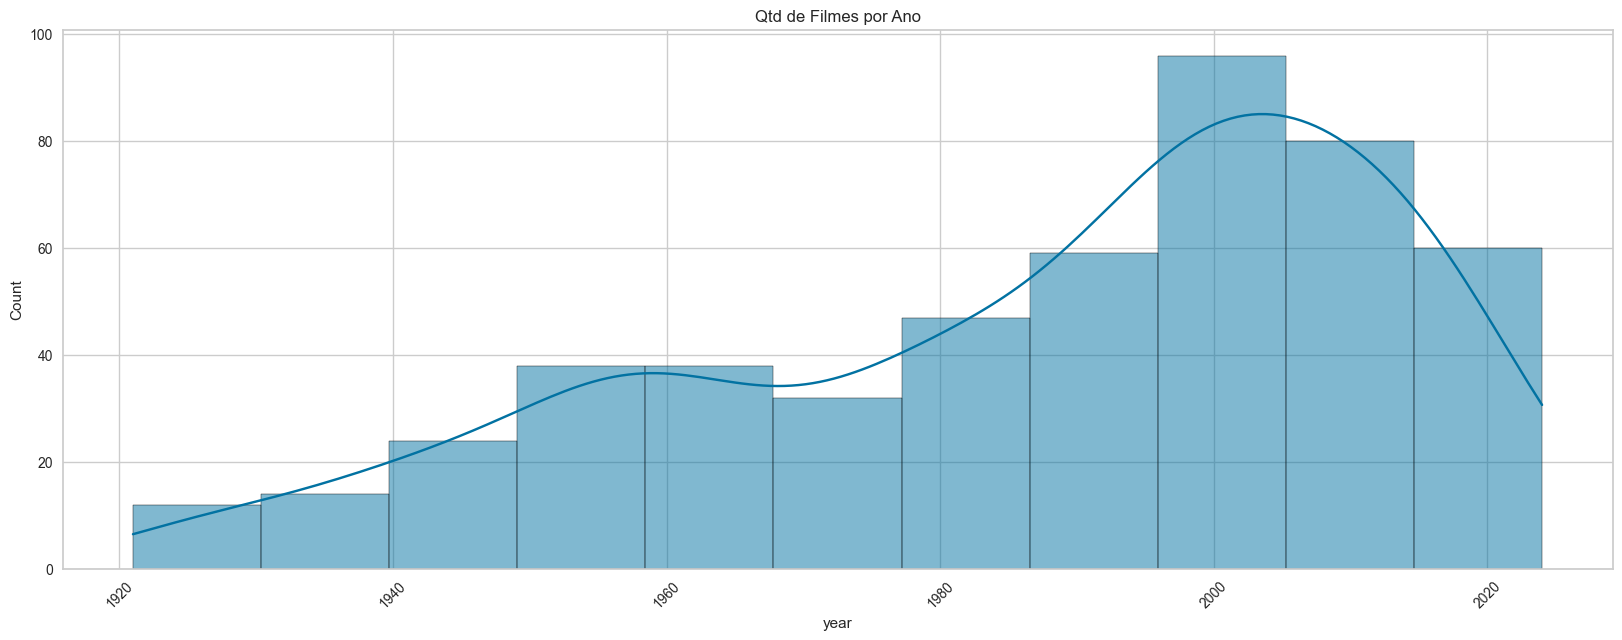

In [133]:
plt.figure(figsize = (20,7))
sns.histplot( df,
              x = 'year',
              kde = True).set_title('Qtd de Filmes por Ano')
plt.xticks(rotation=45)
plt.show()

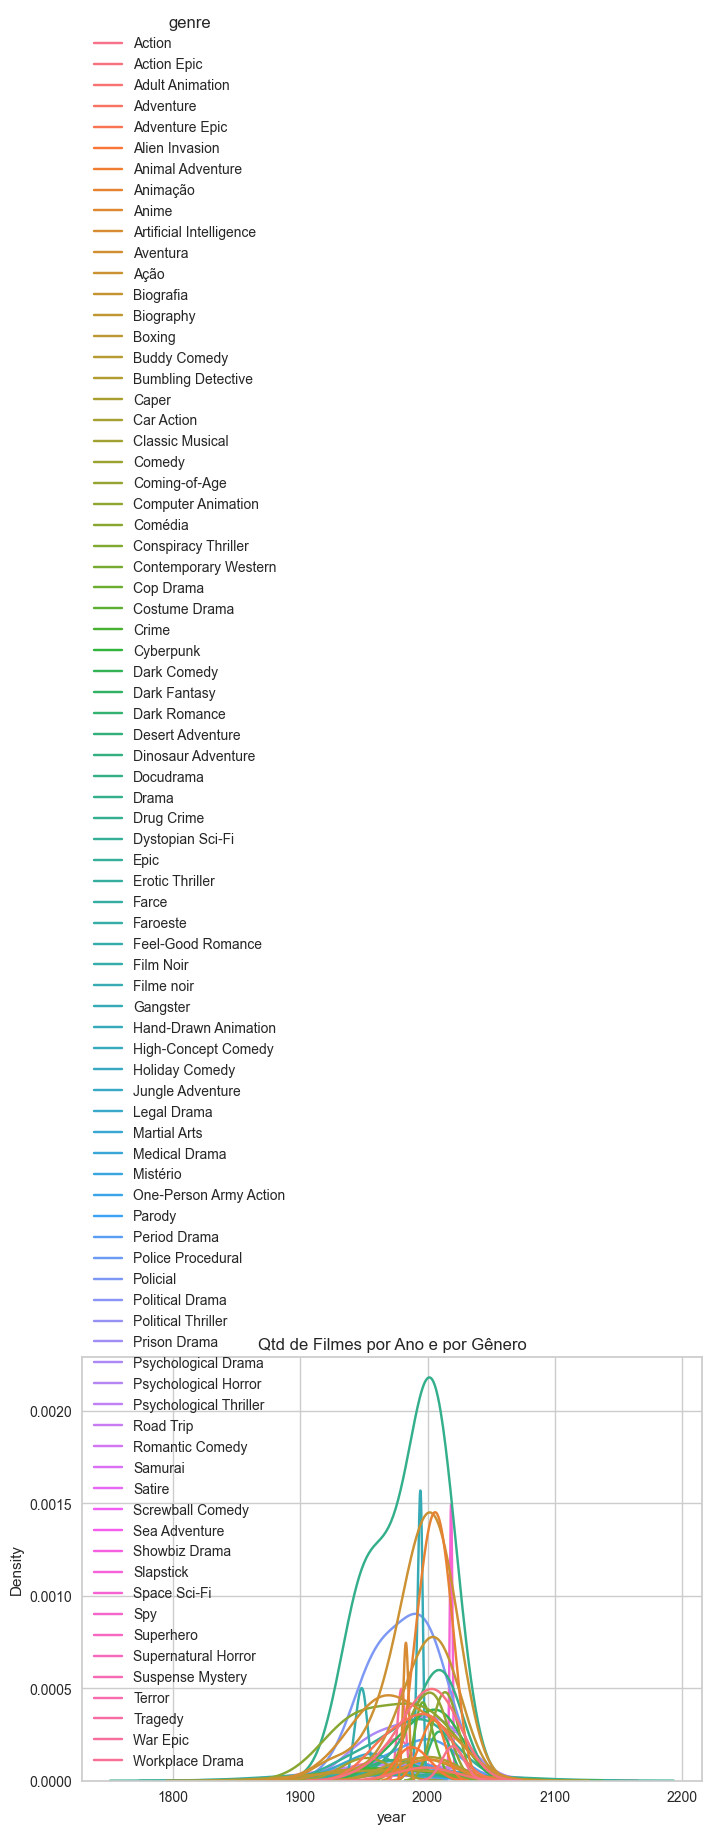

In [134]:
sns.kdeplot( df, x = 'year', hue = 'genre', bw_adjust = 1.5, warn_singular = False).set_title('Qtd de Filmes por Ano e por Gênero')
plt.show()

In [135]:
#convert sinopses to lowercase
df_processed = df.copy()
df_processed['sinopse'] = df_processed['sinopse'].str.lower()
df_processed['sinopse'].head()

377    o lutador mahavir e suas filhas lutadoras proc...
441    um barbeiro busca vingança depois que sua casa...
265    um hacker aprende com os misteriosos rebeldes ...
284    um general romano planeja a melhor vingança co...
278    luke skywalker une forças com um cavaleiro jed...
Name: sinopse, dtype: object

In [136]:
def qty_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [137]:
df_processed['word_count'] = df_processed['sinopse'].apply(qty_words).astype('int64')
df_processed.head()

title_pt  \
377                                       Dangal   
441                                     Maharaja   
265                                       Matrix   
284                                    Gladiador   
278  Star Wars: Episódio IV - Uma Nova Esperança   

                                           title_en  year  rating  \
377             A Queda! As Últimas Horas de Hitler  2016     8.3   
441                     Sociedade dos Poetas Mortos  2024     8.6   
265  Star Wars: Episódio V - O Império Contra-Ataca  1999     8.7   
284                                         Psicose  2000     8.5   
278  O Exterminador do Futuro 2: O Julgamento Final  1977     8.6   

           genre                                            sinopse  \
377       Action  o lutador mahavir e suas filhas lutadoras proc...   
441       Action  um barbeiro busca vingança depois que sua casa...   
265  Action Epic  um hacker aprende com os misteriosos rebeldes ...   
284  Action Epic  um general romano planeja a melhor vingança co...   
278  Action Epic  luke skywalker une forças com um cavaleiro jed...   

     word_count  
377          18  
441          37  
265          22  
284          19  
278          37

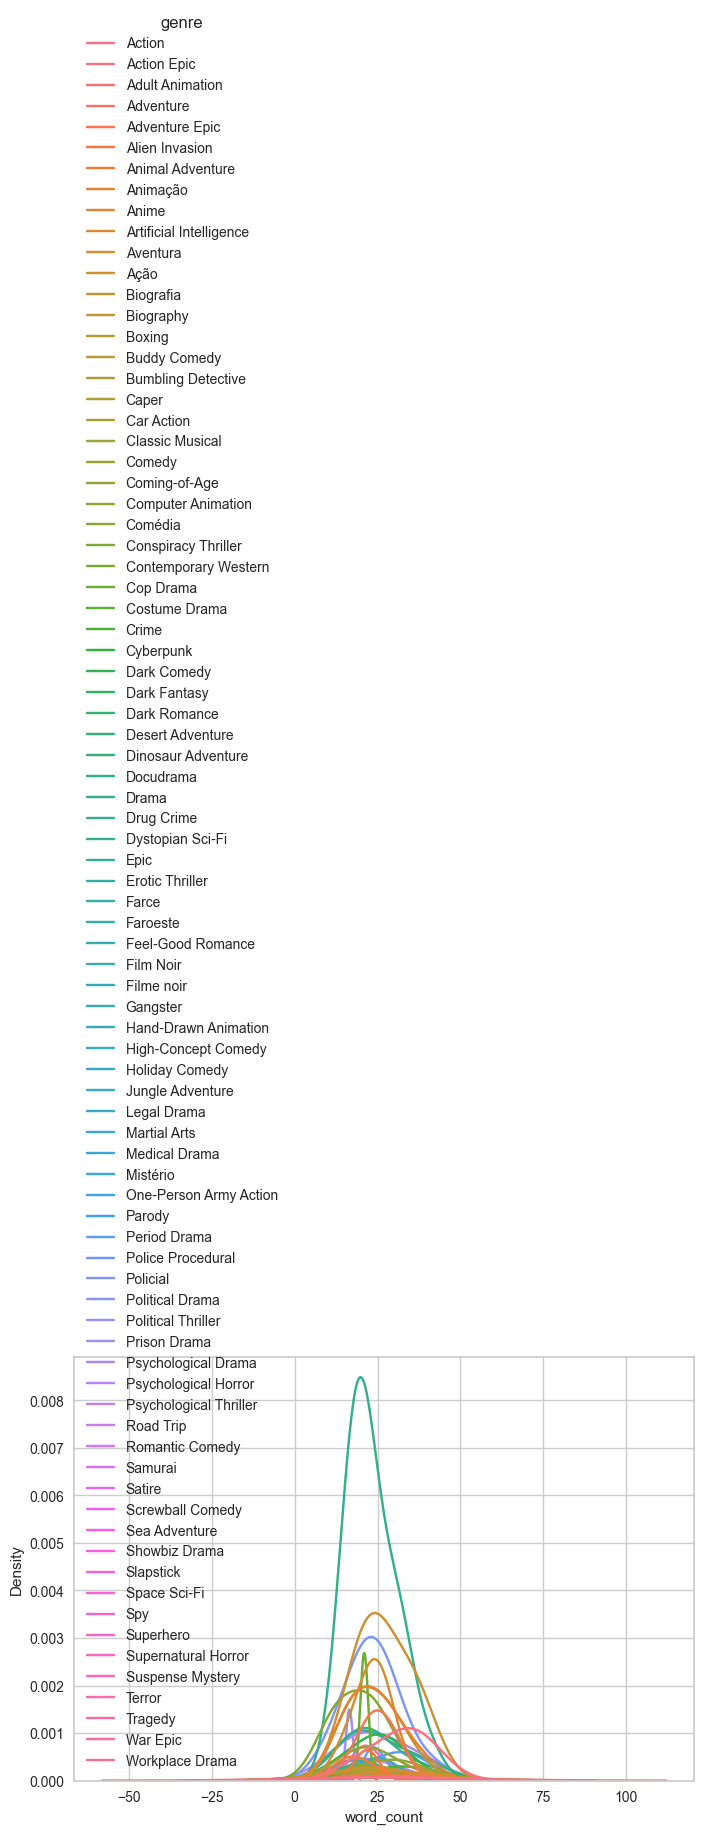

In [138]:
sns.kdeplot( df_processed, x = 'word_count', hue = 'genre', bw_adjust = 1.5, warn_singular = False)
plt.show()

PROCESSAMENTO DE TEXTO

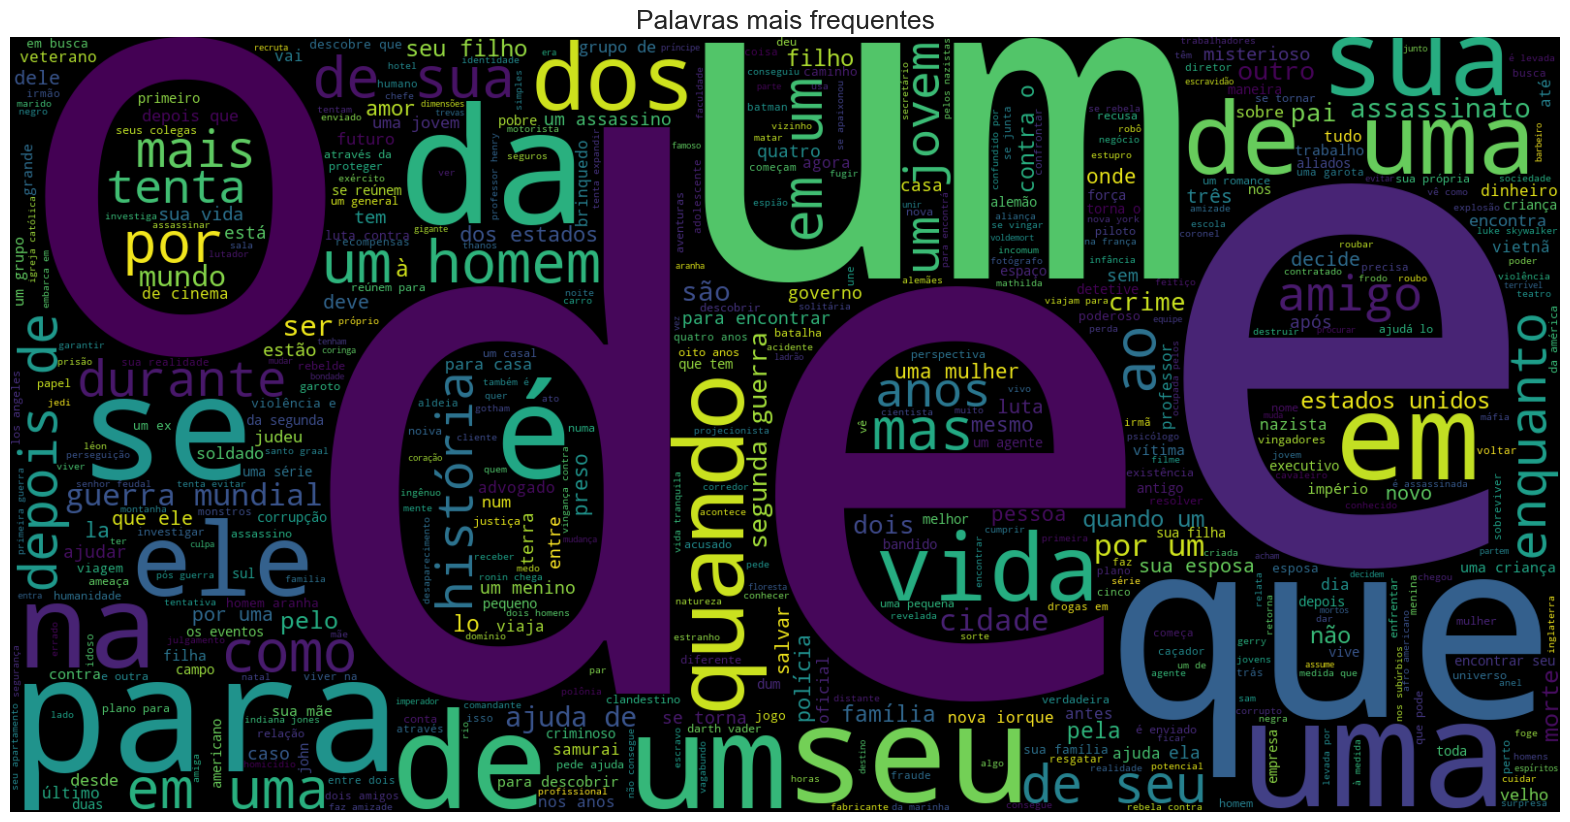

In [139]:
text = ' '.join([phrase for phrase in df_processed['sinopse']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes', fontsize = 19)
plt.show()

In [140]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gustavo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


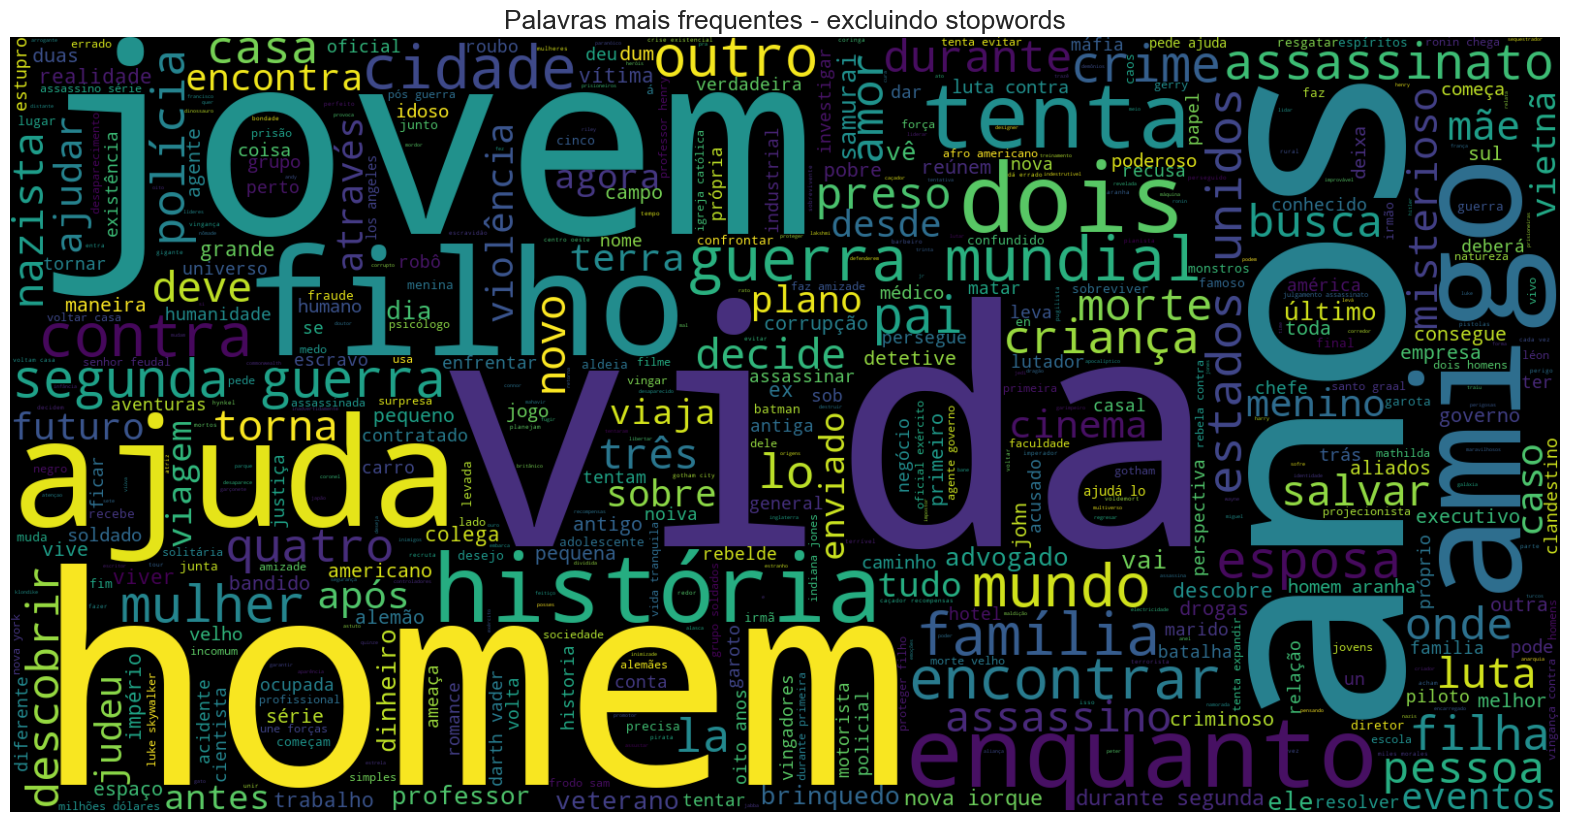

In [141]:
df_processed['sinopse_no_stopwords'] = df_processed['sinopse'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
text = ' '.join([phrase for phrase in df_processed['sinopse_no_stopwords']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes - excluindo stopwords', fontsize = 19)
plt.show()

TF-IDF

In [142]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=.05, max_df=0.95, ngram_range=(1,2))
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_processed['sinopse_no_stopwords'])

In [143]:
print(X.shape)
X.toarray()

(500, 13)


array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.74344074, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.72336688],
       [0.        , 0.        , 0.        , ..., 0.6122781 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

KMEANS

In [144]:
df_processed

title_pt  \
377                                       Dangal   
441                                     Maharaja   
265                                       Matrix   
284                                    Gladiador   
278  Star Wars: Episódio IV - Uma Nova Esperança   
..                                           ...   
492                                Amores Brutos   
499                             Sonata de Outono   
447                            O Franco Atirador   
329                      O Barco: Inferno no Mar   
479                             Rede de Intrigas   

                                           title_en  year  rating  \
377             A Queda! As Últimas Horas de Hitler  2016     8.3   
441                     Sociedade dos Poetas Mortos  2024     8.6   
265  Star Wars: Episódio V - O Império Contra-Ataca  1999     8.7   
284                                         Psicose  2000     8.5   
278  O Exterminador do Futuro 2: O Julgamento Final  1977     8.6   
..                                              ...   ...     ...   
492                              O Gigante de Ferro  2000     8.0   
499                                         Aladdin  1978     8.1   
447                               Relatos Selvagens  1978     8.1   
329                                 Coração Valente  1981     8.4   
479                                    Os Incríveis  1976     8.1   

               genre                                            sinopse  \
377           Action  o lutador mahavir e suas filhas lutadoras proc...   
441           Action  um barbeiro busca vingança depois que sua casa...   
265      Action Epic  um hacker aprende com os misteriosos rebeldes ...   
284      Action Epic  um general romano planeja a melhor vingança co...   
278      Action Epic  luke skywalker une forças com um cavaleiro jed...   
..               ...                                                ...   
492          Tragedy  um terrível acidente de carro conecta três his...   
499          Tragedy  uma filha casada que anseia pelo amor de sua m...   
447         War Epic  um retrato detalhado das maneiras pelas quais ...   
329         War Epic  o mundo claustrofóbico de um submarino da segu...   
479  Workplace Drama  uma rede de televisão explora os delírios e re...   

     word_count                               sinopse_no_stopwords  
377          18  lutador mahavir filhas lutadoras procuram glor...  
441          37  barbeiro busca vingança casa assaltada, dizend...  
265          22  hacker aprende misteriosos rebeldes sobre verd...  
284          19  general romano planeja melhor vingança contra ...  
278          37  luke skywalker une forças cavaleiro jedi, pilo...  
..          ...                                                ...  
492          30  terrível acidente carro conecta três histórias...  
499          20  filha casada anseia amor mãe visitada ela, pia...  
447          23  retrato detalhado maneiras quais guerra vietnã...  
329          16  mundo claustrofóbico submarino segunda guerra ...  
479          13  rede televisão explora delírios revelações hom...  

[500 rows x 8 columns]

2 244.13791744680282
3 218.81902896634278
4 191.85552982169392
5 165.37969397560946
6 148.27367093864763
7 126.84742375885223
8 101.19321143343093
9 82.61510338476691
10 68.22866145330077
11 61.11054482894974
12 53.36723040141254
13 48.811118576731694
14 43.57118932336076
15 42.616573533102525
16 42.60628918262385
17 40.159241444476066
18 38.703114668070675
19 35.16567067017327
20 33.486784490978195
21 32.71020034495618
22 31.86273777334053
23 29.638416455315788
24 26.149447891099367
25 27.880958836466707
26 25.863876991663872
27 25.41108159922732
28 24.060110606573037
29 23.07100387622627
30 20.47950160430467
31 22.20883856603605
32 21.24129305782473
33 19.15523811557943
34 17.83884069628002
35 15.78373677757704
36 16.21179127393112
37 15.477218534844821
38 13.719553961001782
39 13.84530131312388
40 11.217141200927903
41 9.324640178621912
42 9.301320819878068
43 8.518677949319397
44 6.349660811337898
45 6.368687642965183
46 5.475971236810117
47 4.115138802720143
48 4.741088243122504
4

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (64). Possibly due to duplicate points in X.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (65). Possibly due to duplicate points in X.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (66). Possibly due to duplicate points in X.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (67). Possibly due to duplicate points in X.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1

69 5.000000000000002


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (69). Possibly due to duplicate points in X.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (70). Possibly due to duplicate points in X.



70 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (71). Possibly due to duplicate points in X.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (72). Possibly due to duplicate points in X.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (73). Possibly due to duplicate points in X.



71 2.9976021664879227e-15
72 5.000000000000002
73 2.0000000000000018


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (74). Possibly due to duplicate points in X.



74 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (75). Possibly due to duplicate points in X.



75 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (76). Possibly due to duplicate points in X.



76 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (77). Possibly due to duplicate points in X.



77 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (78). Possibly due to duplicate points in X.



78 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (79). Possibly due to duplicate points in X.



79 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (80). Possibly due to duplicate points in X.



80 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (81). Possibly due to duplicate points in X.



81 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (82). Possibly due to duplicate points in X.



82 7.771561172376096e-16
83 2.9976021664879227e-15


c:\Users\Gustavo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning:

Number of distinct clusters (63) found smaller than n_clusters (83). Possibly due to duplicate points in X.



Text(0, 0.5, 'WCSS')

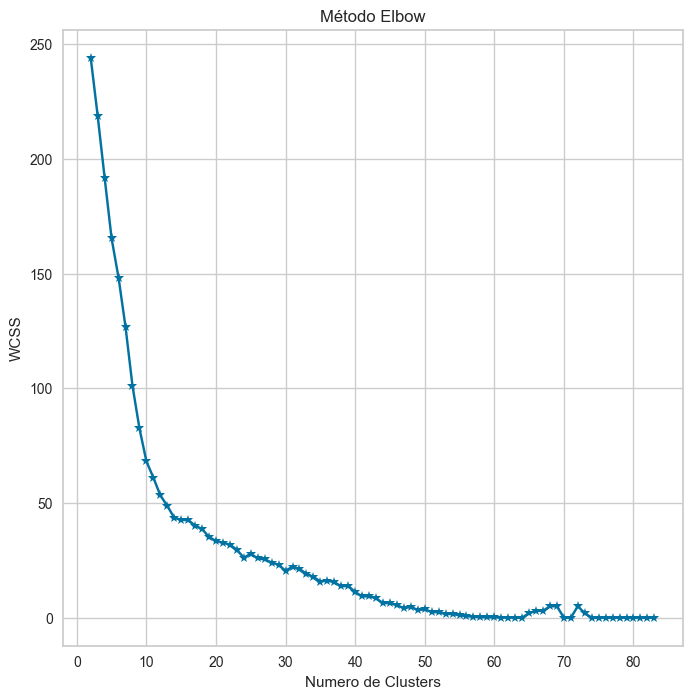

In [145]:
plt.figure(figsize = (8,8))

#plotando o grafico do método elbow
wcss = []

for i in range(2, df_processed.genre.nunique()+1):
  kmeans = KMeans(n_clusters = i, init = 'random')
  kmeans.fit(X)
  print(i, kmeans.inertia_)
  wcss.append(kmeans.inertia_)

plt.plot(range(2, df_processed.genre.nunique()+1), wcss, '*-')
plt.title('Método Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of square


In [146]:
df_processed.genre.nunique()

83

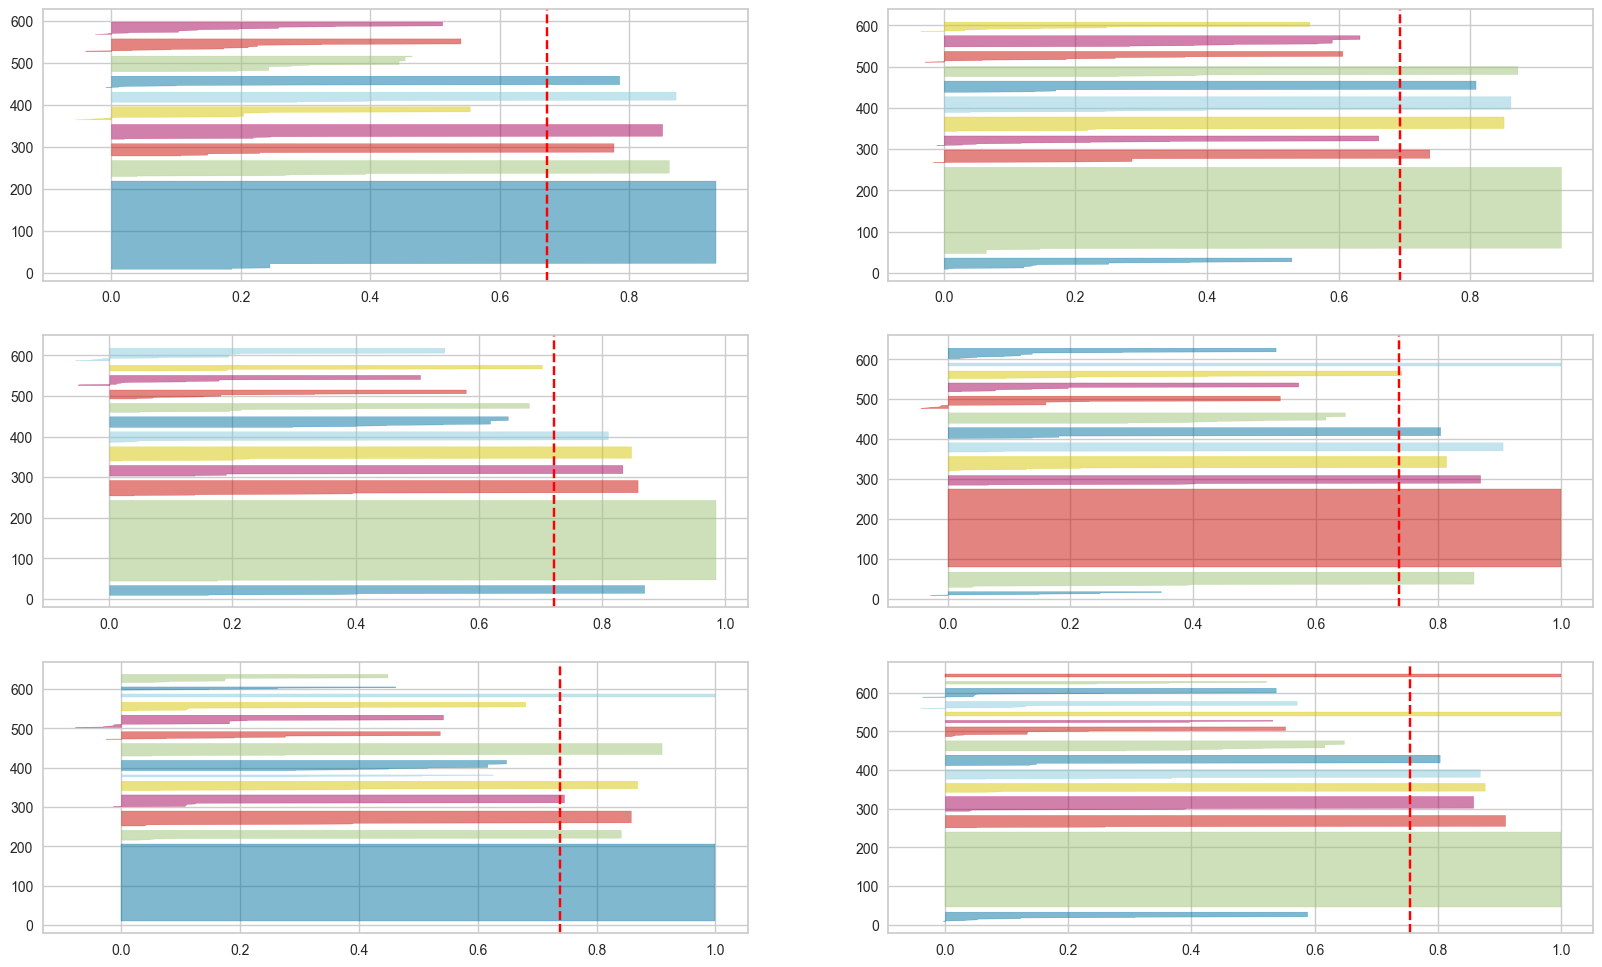

In [147]:
# fig, ax = plt.subplots(3,2, figsize = (20,12))
# for i in (range(10, 17)):
#   #Creating KMeans instance for different number of clusters
#   kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
#   q, mod = divmod(i,2)

#   #Creating SilhouetteVisualizer instance with KMeans instance
#   #Fit the visualizer

#   visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q-1][mod])
#   visualizer.fit(X)

fig, ax = plt.subplots(3,2, figsize = (20,12))
for i in range(6):  # Adjusted loop to match the number of subplots
    #Creating KMeans instance for different number of clusters
    kmeans = KMeans(n_clusters = i + 10, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i, 2)  # Calculate row and column indices

    #Creating SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer

    visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q][mod])  # Access correct subplot
    visualizer.fit(X)

In [148]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans = kmeans.fit(X)
#predicting the clusters and store cluster labels in a variable
labels = kmeans.predict(X)
#getting the cluster centers
c = kmeans.cluster_centers_

df_processed['cluster'] = labels
df_processed.head()

title_pt  \
377                                       Dangal   
441                                     Maharaja   
265                                       Matrix   
284                                    Gladiador   
278  Star Wars: Episódio IV - Uma Nova Esperança   

                                           title_en  year  rating  \
377             A Queda! As Últimas Horas de Hitler  2016     8.3   
441                     Sociedade dos Poetas Mortos  2024     8.6   
265  Star Wars: Episódio V - O Império Contra-Ataca  1999     8.7   
284                                         Psicose  2000     8.5   
278  O Exterminador do Futuro 2: O Julgamento Final  1977     8.6   

           genre                                            sinopse  \
377       Action  o lutador mahavir e suas filhas lutadoras proc...   
441       Action  um barbeiro busca vingança depois que sua casa...   
265  Action Epic  um hacker aprende com os misteriosos rebeldes ...   
284  Action Epic  um general romano planeja a melhor vingança co...   
278  Action Epic  luke skywalker une forças com um cavaleiro jed...   

     word_count                               sinopse_no_stopwords  cluster  
377          18  lutador mahavir filhas lutadoras procuram glor...        0  
441          37  barbeiro busca vingança casa assaltada, dizend...        0  
265          22  hacker aprende misteriosos rebeldes sobre verd...        0  
284          19  general romano planeja melhor vingança contra ...        0  
278          37  luke skywalker une forças cavaleiro jedi, pilo...        2

In [149]:
fig = px.bar(df_processed.cluster.value_counts(),
             text_auto = True,
             title = 'Qtd de Filmes por Cluster',
             labels = {'index': 'Cluster #',
                       'value':'Qtd. de Filmes'})
fig.show()

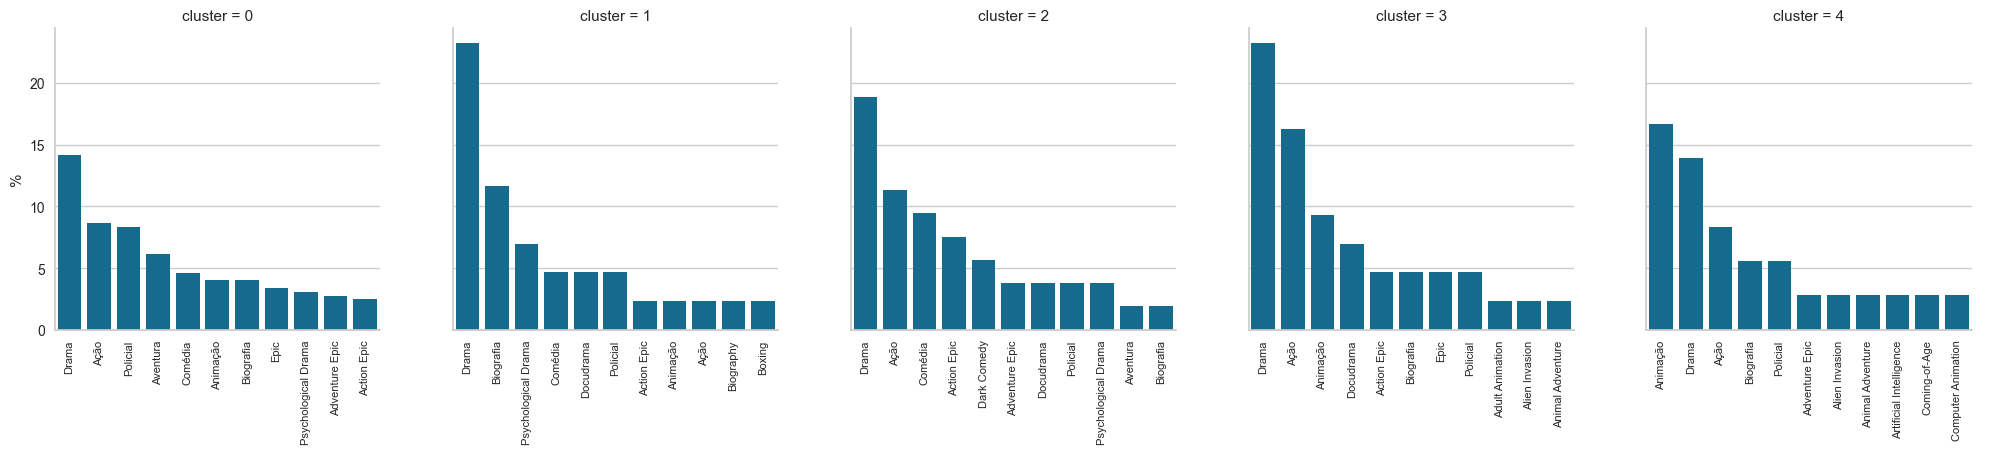

In [150]:
df_plot = df_processed.groupby(['cluster', 'genre'])['title_pt'].count()
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'title_pt':'count'}, inplace = True)
df_plot['%'] = 100 * df_plot['count'] / df_plot.groupby('cluster')['count'].transform('sum')
df_plot = df_plot.sort_values(['cluster', '%'], ascending = False).groupby('cluster').head(11)

fig = sns.catplot(
    data=df_plot, x="genre", y = "%", col="cluster",
    kind="bar", height=4, aspect=1, sharex = False);
fig.set_xlabels('');
fig.set_xticklabels(rotation=90, size = 8);

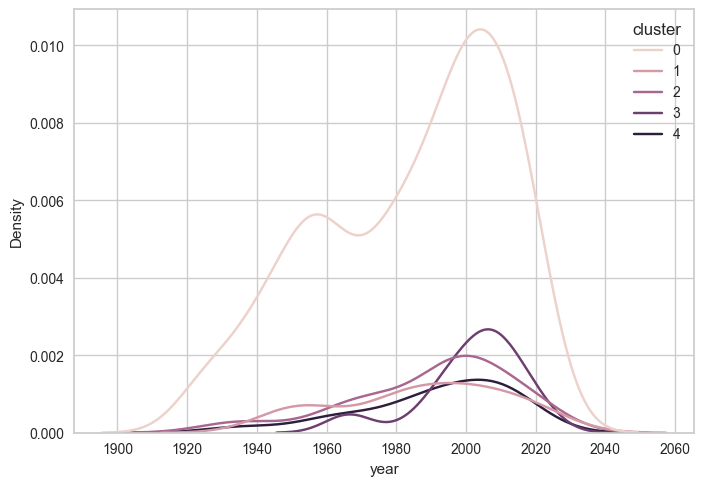

In [151]:
sns.kdeplot(df_processed, x = 'year', hue = 'cluster');

In [152]:
df_pivot = df_plot.copy()
df_pivot = df_pivot.pivot(index = 'cluster', columns = 'genre', values = '%')
df_pivot.fillna(0, inplace = True)
df_pivot = df_pivot.T.reset_index()
df_pivot.index.name = None
df_pivot

cluster                    genre          0          1          2          3  \
0                    Action Epic   2.461538   2.325581   7.547170   4.651163   
1                Adult Animation   0.000000   0.000000   0.000000   2.325581   
2                 Adventure Epic   2.769231   0.000000   3.773585   0.000000   
3                 Alien Invasion   0.000000   0.000000   0.000000   2.325581   
4               Animal Adventure   0.000000   0.000000   0.000000   2.325581   
5                       Animação   4.000000   2.325581   0.000000   9.302326   
6        Artificial Intelligence   0.000000   0.000000   0.000000   0.000000   
7                       Aventura   6.153846   0.000000   1.886792   0.000000   
8                           Ação   8.615385   2.325581  11.320755  16.279070   
9                      Biografia   4.000000  11.627907   1.886792   4.651163   
10                     Biography   0.000000   2.325581   0.000000   0.000000   
11                        Boxing   0.000000   2.325581   0.000000   0.000000   
12                 Coming-of-Age   0.000000   0.000000   0.000000   0.000000   
13            Computer Animation   0.000000   0.000000   0.000000   0.000000   
14                       Comédia   4.615385   4.651163   9.433962   0.000000   
15                   Dark Comedy   0.000000   0.000000   5.660377   0.000000   
16                     Docudrama   0.000000   4.651163   3.773585   6.976744   
17                         Drama  14.153846  23.255814  18.867925  23.255814   
18                          Epic   3.384615   0.000000   0.000000   4.651163   
19                      Policial   8.307692   4.651163   3.773585   4.651163   
20           Psychological Drama   3.076923   6.976744   3.773585   0.000000   

cluster          4  
0         0.000000  
1         0.000000  
2         2.777778  
3         2.777778  
4         2.777778  
5        16.666667  
6         2.777778  
7         0.000000  
8         8.333333  
9         5.555556  
10        0.000000  
11        0.000000  
12        2.777778  
13        2.777778  
14        0.000000  
15        0.000000  
16        0.000000  
17       13.888889  
18        0.000000  
19        5.555556  
20        0.000000

In [153]:
df_polar = df_pivot.melt(id_vars=['genre'])
df_polar.head()

genre cluster     value
0       Action Epic       0  2.461538
1   Adult Animation       0  0.000000
2    Adventure Epic       0  2.769231
3    Alien Invasion       0  0.000000
4  Animal Adventure       0  0.000000

In [154]:
fig = px.line_polar(df_polar, r='value', theta='genre', color = 'cluster', line_close=True)
fig.show();

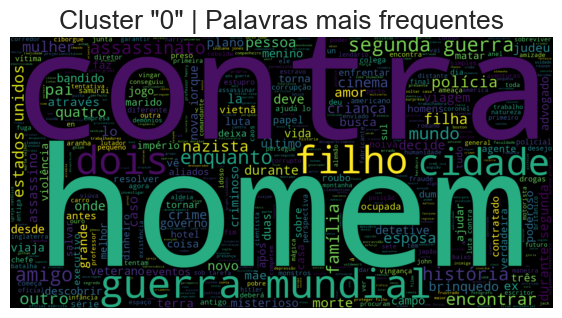

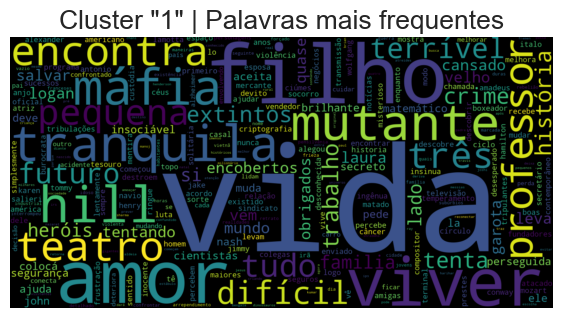

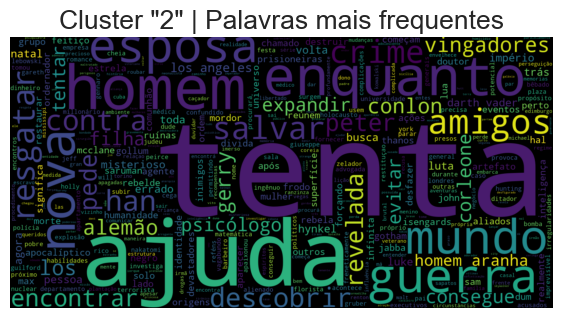

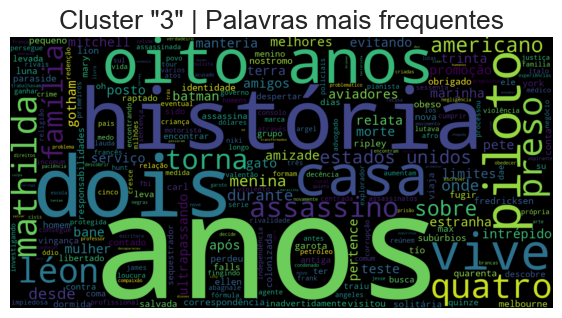

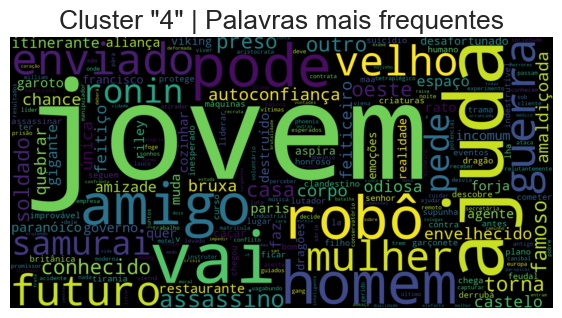

In [155]:
def word_cloud_cluster(cluster:int):
  text = ' '.join([phrase for phrase in df_processed.loc[df_processed.cluster == cluster]['sinopse_no_stopwords']])
  plt.figure(figsize=(7,5), facecolor='None')
  wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Cluster "{cluster}" | Palavras mais frequentes', fontsize = 19)
  plt.show()
  return

for c in range(5):
  word_cloud_cluster(c)

O cluster 0 apresentou um número muito maior número de filmes que os outros clusters, provavelmente devido a relação de um número baixo de clusters e também um número baixo informações divergêntes entre os filmes (poucos genêros e etc) (Idealmente os cluster devem conter quantidades balanceadas, porém neste projeto, por ter um dataset com baixo número de amostras (275), não foi possível atender esta premissa).

*O genêro dominante foi o "Drama", ele está presente como o principal genêro em todos os clusters exceto o 4, onde ele perde para o genêro de animação para fica em 2º lugar

TOP RANKING DOS CLUSTERS:
0. DRAMA - AÇÃO
1. DRAMA - BIOGRAFIA
2. DRAMA - AÇÃO
3. DRAMA - AÇÃO
4. ANIMAÇÃO - DRAMA

Avaliando a distribuição dos anos de lançamento dos filmes por cluster, existe uma maior concentração ao redor dos anos 2000 em todos os clusters. O cluster 1 teve um número maior de filmes lançados aproximadamente nos anos 50 que os outros clusters (exceto ao 0 devido a quantidade de filmes, mas em proporções iguais, o cluster 1 teria mais). Pode exister uma relação de idade de lançamento nos clusters.

Depois foi apresentado um gráfico de radar por cluster, nele podemos ver e entender a divisão de cluster por genêros e como os genêros dos glusters se complementam, por exemplo "drama - comédia - ação" no cluster 2 e "drama - animação - ação" no cluster 4

TOP PALAVRAS RELEVANTES NA NUVEM DE PALAVRA DE CADA CLUSTER:
0. Guerra Mundial, Nazista, História, Contra
1. Mutante, Máfia, Teatro, Viviver, Professor
2. Resgatar, Ajuda, Amigos, Guerra, vingadores
3. Assasino, Piloto, Preso, Americano, Estados Unidos
4. Jovem, Robô, futuro, Velho, Amaldiçoada